In [1]:
import pandas as pd
import numpy as np

In [2]:
#read data
df = pd.read_csv("C:/Users/guyu8/Documents/data1030/DATA1030-Fall2023/midterm- project/ML_data.csv")
#print(df.shape)
#print(df.head(20))
# df = df[10:]
#df.set_index('date', inplace=True)
print(df.shape)
print(df.head())
# df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

(633, 34)
         date        Ex  ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  \
0  1971-01-01  358.0200     NaN     NaN     NaN     NaN     NaN     NaN   
1  1971-02-01  357.5450     NaN     NaN     NaN     NaN     NaN     NaN   
2  1971-03-01  357.5187     NaN     NaN     NaN     NaN     NaN     NaN   
3  1971-04-01  357.5032     NaN     NaN     NaN     NaN     NaN     NaN   
4  1971-05-01  357.4130     NaN     NaN     NaN     NaN     NaN     NaN   

   ExLag7  ExLag8  ...  R2Lag1  R2Lag2  R2Lag3  R2Lag4  R2Lag5  R2Lag6  \
0     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

   R2Lag7  R2Lag8  R2Lag9  R2Lag10  
0     NaN     NaN     NaN      NaN  
1     NaN     NaN   

In [3]:
#check if there is any missing data
perc_missing_per_ftr = df.isnull().sum(axis = 0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

frac_missing = sum(df.isnull().sum(axis = 1) != 0 )/ df.shape[0]
print('fraction of points with missing values:')
print(frac_missing)

fraction of missing values in features:
ExLag1     0.015798
ExLag2     0.015798
ExLag3     0.015798
ExLag4     0.015798
ExLag5     0.015798
ExLag6     0.015798
ExLag7     0.015798
ExLag8     0.015798
ExLag9     0.015798
ExLag10    0.015798
R1Lag1     0.015798
R1Lag2     0.015798
R1Lag3     0.015798
R1Lag4     0.015798
R1Lag5     0.015798
R1Lag6     0.015798
R1Lag7     0.015798
R1Lag8     0.015798
R1Lag9     0.015798
R1Lag10    0.015798
R2         0.121643
R2Lag1     0.137441
R2Lag2     0.137441
R2Lag3     0.137441
R2Lag4     0.137441
R2Lag5     0.137441
R2Lag6     0.137441
R2Lag7     0.137441
R2Lag8     0.137441
R2Lag9     0.137441
R2Lag10    0.137441
dtype: float64
fraction of points with missing values:
0.13744075829383887


In [4]:
#check if the data is correct
print(df[df['Ex']>360].any().any())
print(df[df['Ex']<70].any().any())
print(df[df['R1']<0].any().any())
print(df[df['R2']<0].any().any())

False
False
False
False


In [5]:
print(df['Ex'].describe())

count    633.000000
mean     156.705209
std       70.992032
min       76.643000
25%      108.068500
50%      121.635000
75%      216.285200
max      358.020000
Name: Ex, dtype: float64


Text(0, 0.5, 'Count')

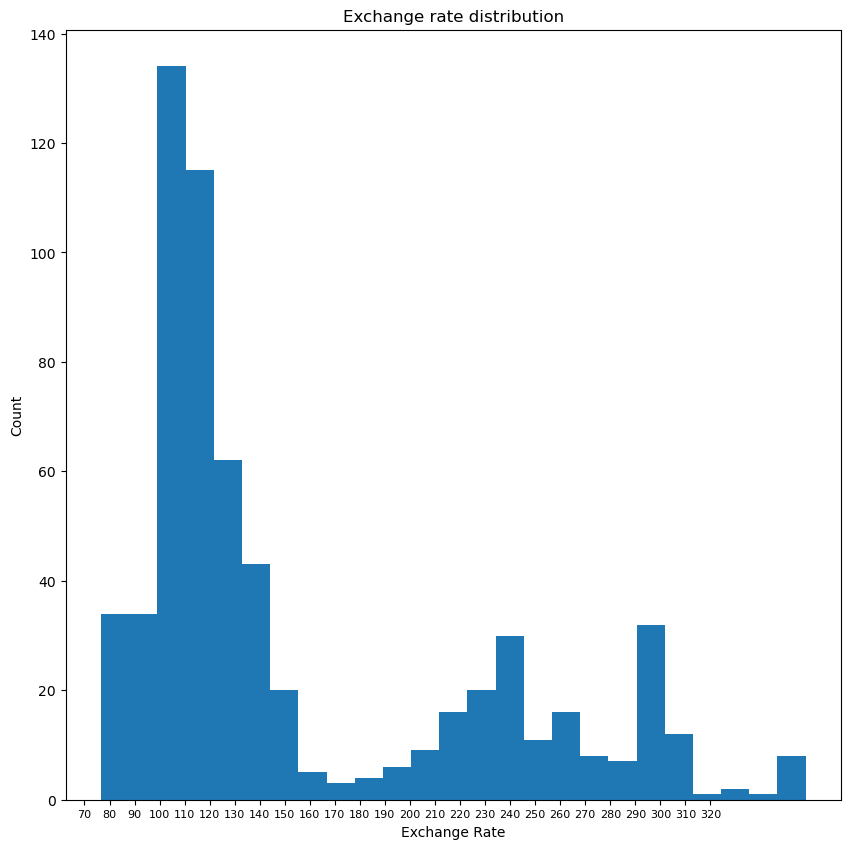

In [6]:
import matplotlib 
from matplotlib import pylab as plt

plt.figure(figsize = (10,10))


df['Ex'].plot.hist(bins = int(np.sqrt(df.shape[0])))
x_ticks_labels = [10*i for i in range (7,33)]
plt.title('Exchange rate distribution')
plt.xticks(x_ticks_labels,fontsize = 8)
plt.xlabel('Exchange Rate')
plt.ylabel('Count')

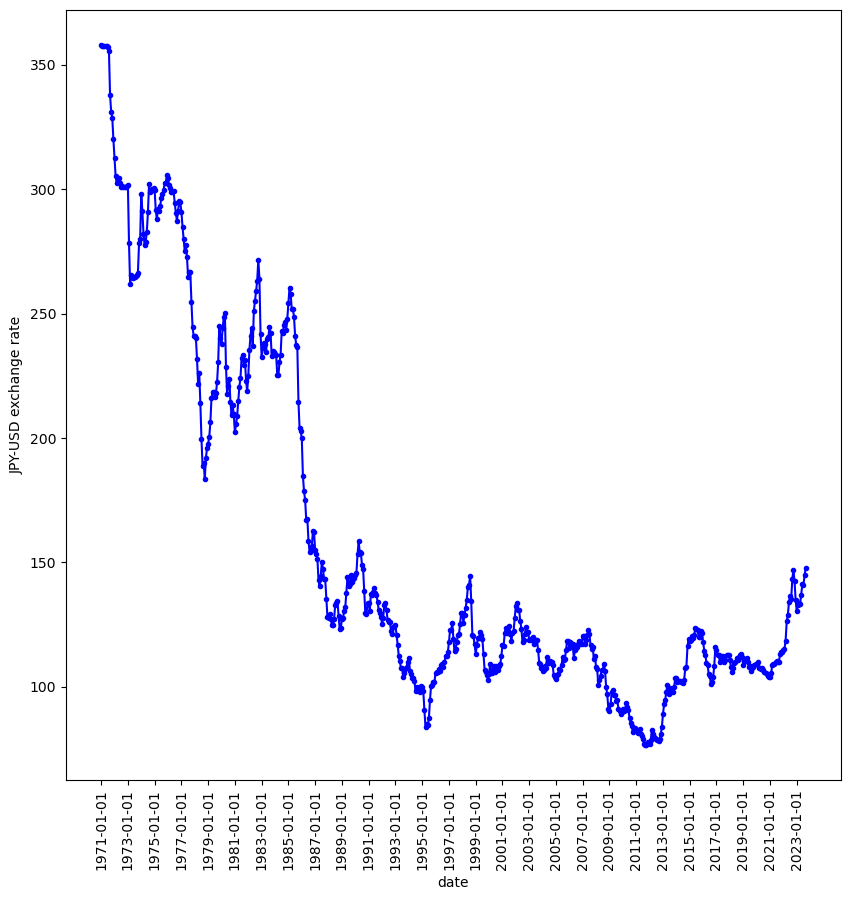

In [8]:
from matplotlib.dates import MonthLocator, DateFormatter

plt.figure(figsize = (10,10))
plt.plot( df['date'],df['Ex'], label='Exchange rate trend', color='blue', marker='o', markersize=3)

plt.xticks(np.arange(len(df['date']))[::24],df['date'].iloc[::24],rotation = 90)

plt.xlabel('date')
plt.ylabel('JPY-USD exchange rate')

plt.show()




           date        Ex  ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  \
192  1987-01-01  154.8295  162.05  162.85  156.47  154.73  154.18  158.61   
193  1987-02-01  153.4068  154.83  162.05  162.85  156.47  154.73  154.18   
194  1987-03-01  151.4332  153.41  154.83  162.05  162.85  156.47  154.73   
195  1987-04-01  142.8986  151.43  153.41  154.83  162.05  162.85  156.47   
196  1987-05-01  140.4790  142.90  151.43  153.41  154.83  162.05  162.85   

     ExLag7  ExLag8  ...  R2Lag1  R2Lag2  R2Lag3  R2Lag4  R2Lag5  R2Lag6  \
192  167.54  167.03  ...     3.0     3.0     3.5     3.5     3.5     3.5   
193  158.61  167.54  ...     3.0     3.0     3.0     3.5     3.5     3.5   
194  154.18  158.61  ...     2.5     3.0     3.0     3.0     3.5     3.5   
195  154.73  154.18  ...     2.5     2.5     3.0     3.0     3.0     3.5   
196  156.47  154.73  ...     2.5     2.5     2.5     3.0     3.0     3.0   

     R2Lag7  R2Lag8  R2Lag9  R2Lag10  
192     3.5     3.5     3.5      4.0  
19

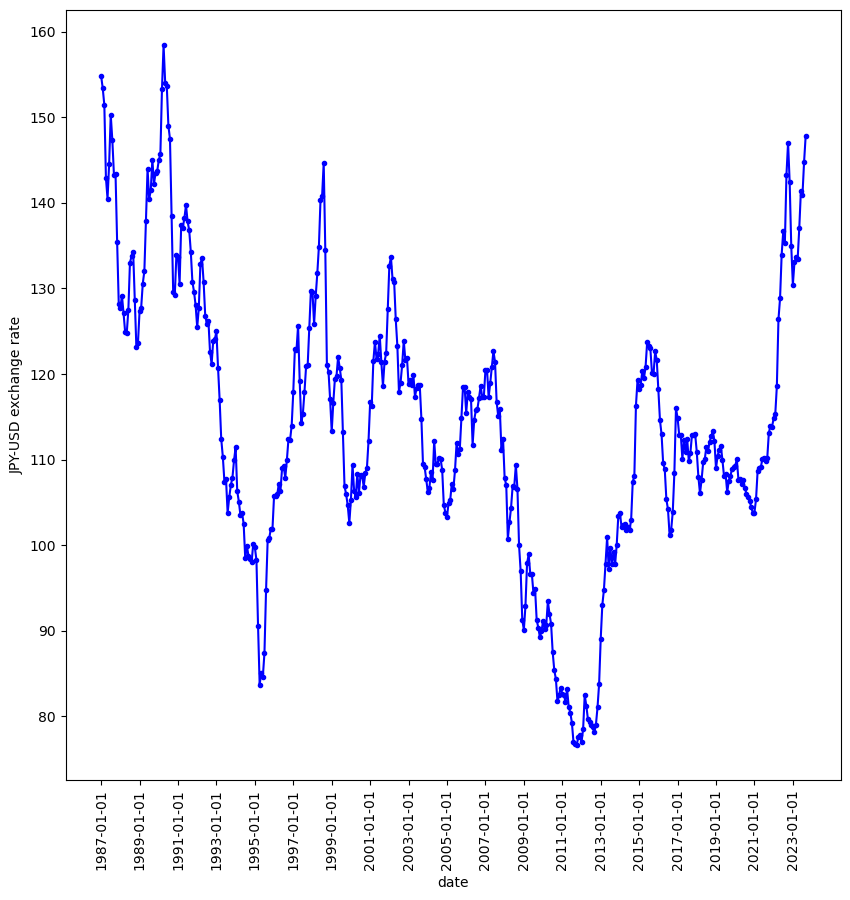

In [18]:
df87 = df[192:]
print(df87.head())

plt.figure(figsize = (10,10))
plt.plot( df87['date'],df87['Ex'], label='Exchange rate trend', color='blue', marker='o', markersize=3)

plt.xticks(np.arange(len(df87['date']))[::24],df87['date'].iloc[::24],rotation = 90)
plt.xlabel('date')
plt.ylabel('JPY-USD exchange rate')

plt.show()

In [9]:
dataR = pd.melt(df, id_vars=['date'], value_vars=['R1', 'R2'])#, ignore_index=False)
dfR = pd.DataFrame(dataR)
print(dfR.dtypes)
dfR['variable'] = dfR['variable'].astype('category')
dfR['date'] = pd.to_datetime(dfR['date'])
dfR['variable'] = dfR['variable'].cat.codes

print(dfR.dtypes)

date         object
variable     object
value       float64
dtype: object
date        datetime64[ns]
variable              int8
value              float64
dtype: object


In [10]:
print(dfR['variable'].unique())

[0 1]


In [11]:
from ydata_profiling.visualisation.plot import timeseries_heatmap

timeseries_heatmap(dataframe=dfR, entity_column='variable', sortby='date')

ModuleNotFoundError: No module named 'ydata_profiling'

                  Ex  ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  ExLag7  \
date                                                                           
1987-01-01  154.8295  162.05  162.85  156.47  154.73  154.18  158.61  167.54   
1987-02-01  153.4068  154.83  162.05  162.85  156.47  154.73  154.18  158.61   
1987-03-01  151.4332  153.41  154.83  162.05  162.85  156.47  154.73  154.18   
1987-04-01  142.8986  151.43  153.41  154.83  162.05  162.85  156.47  154.73   
1987-05-01  140.4790  142.90  151.43  153.41  154.83  162.05  162.85  156.47   

            ExLag8  ExLag9  ...  R2Lag1  R2Lag2  R2Lag3  R2Lag4  R2Lag5  \
date                        ...                                           
1987-01-01  167.03  175.09  ...     3.0     3.0     3.5     3.5     3.5   
1987-02-01  167.54  167.03  ...     3.0     3.0     3.0     3.5     3.5   
1987-03-01  158.61  167.54  ...     2.5     3.0     3.0     3.0     3.5   
1987-04-01  154.18  158.61  ...     2.5     2.5     3.0     3.0 

KeyError: 'date'

<Figure size 1000x1500 with 0 Axes>

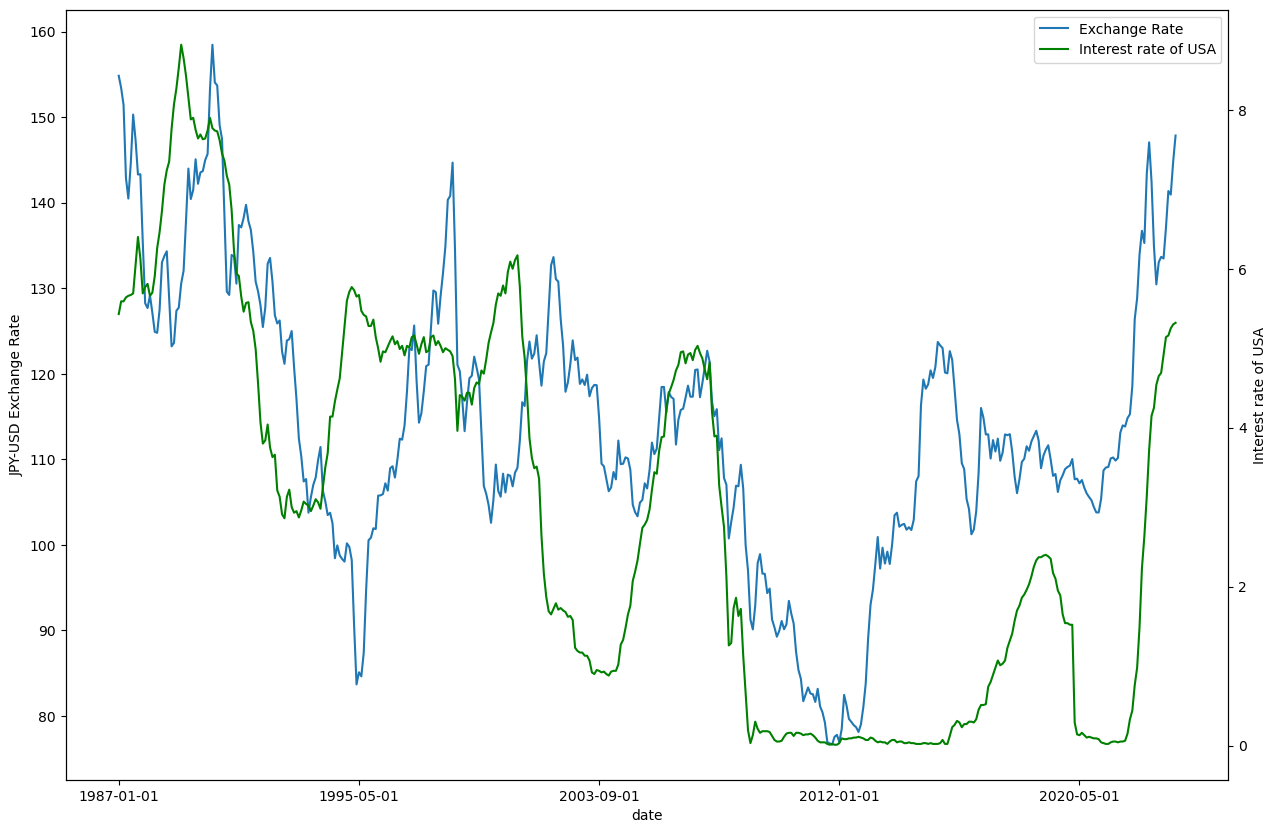

In [30]:

plt.figure(figsize=(10, 15))

dfT = df87
#dfT.set_index('date', inplace=True)
print(dfT.head())

# Set the size of the plot
plt.figure(figsize=(15, 10))  # Width=10 inches, Height=6 inches

# Create the primary Y-axis and plot R1
ax1 = plt.gca()
dfT["Ex"].plot(ax=ax1, label='Exchange Rate')

# Create a twin Axes sharing the same x-axis
ax2 = ax1.twinx()

# Plot R2 on the secondary Y-axis
dfT["R1"].plot(ax=ax2, style="g", label='Interest rate of USA')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('Date')

ax1.set_ylabel('JPY-USD Exchange Rate')
ax2.set_ylabel('Interest rate of USA')


plt.xticks(np.arange(len(dfT['date']))[::24],dfT['date'].iloc[::24],rotation = 45)
plt.show()

KeyError: 'date'

<Figure size 1000x1500 with 0 Axes>

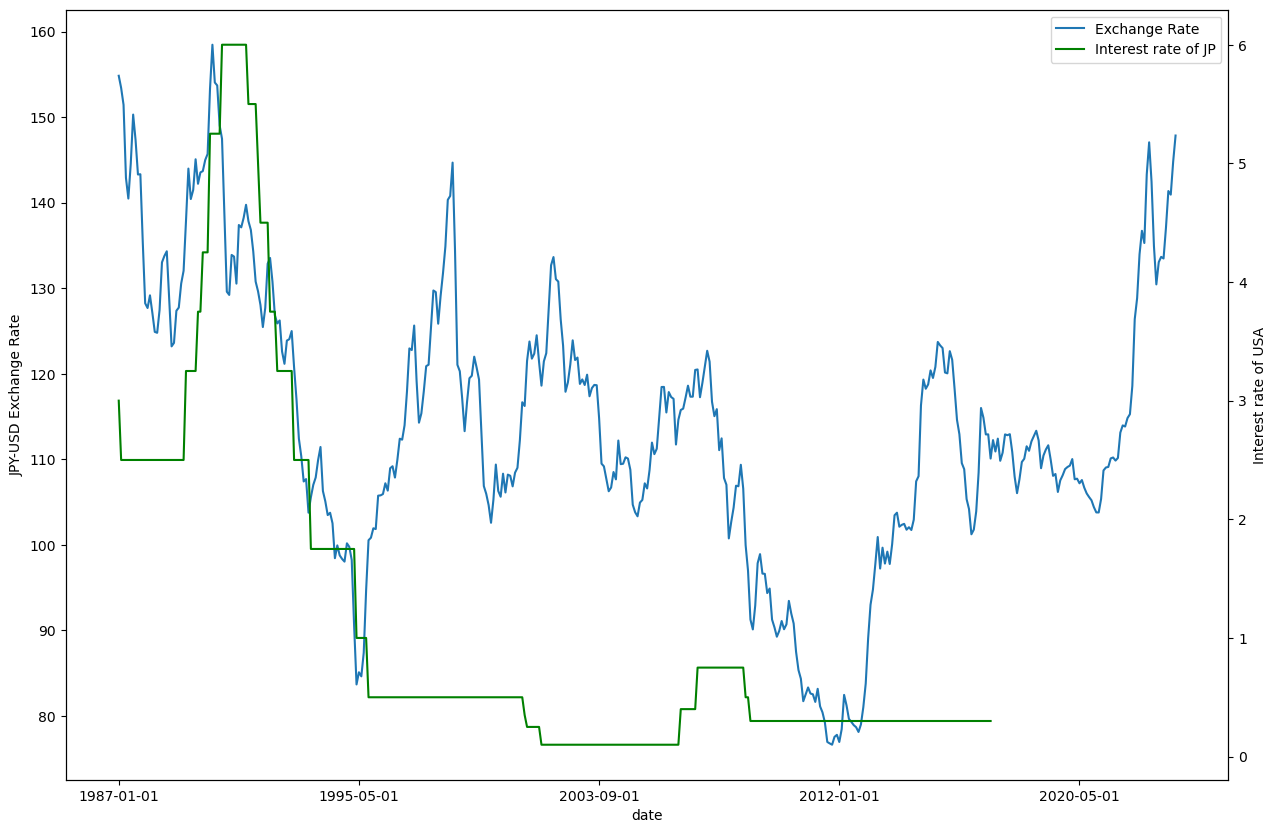

In [31]:
plt.figure(figsize=(10, 15))

dfT = df87
#dfT.set_index('date', inplace=True)

# Set the size of the plot
plt.figure(figsize=(15, 10))  # Width=10 inches, Height=6 inches

# Create the primary Y-axis and plot R1
ax1 = plt.gca()
dfT["Ex"].plot(ax=ax1, label='Exchange Rate')

# Create a twin Axes sharing the same x-axis
ax2 = ax1.twinx()

# Plot R2 on the secondary Y-axis
dfT["R2"].plot(ax=ax2, style="g", label='Interest rate of JP')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('Date')

ax1.set_ylabel('JPY-USD Exchange Rate')
ax2.set_ylabel('Interest rate of USA')


plt.xticks(np.arange(len(dfT['date']))[::24],dfT['date'].iloc[::24],rotation = 45)
plt.show()

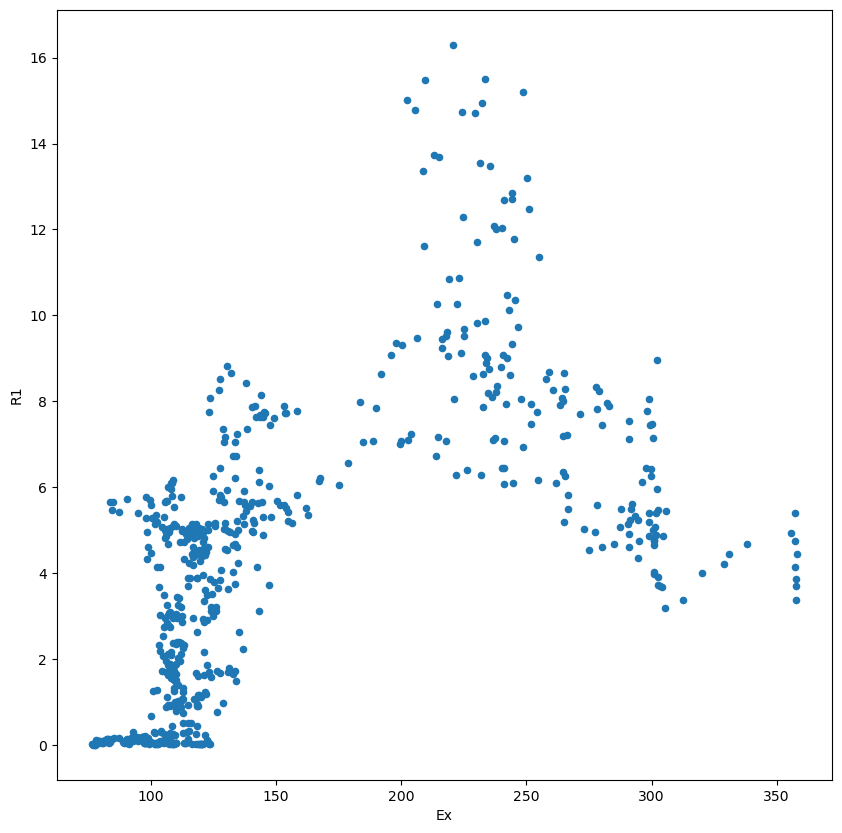

In [36]:
df.plot.scatter('Ex','R1', figsize = (10,10))
plt.show()

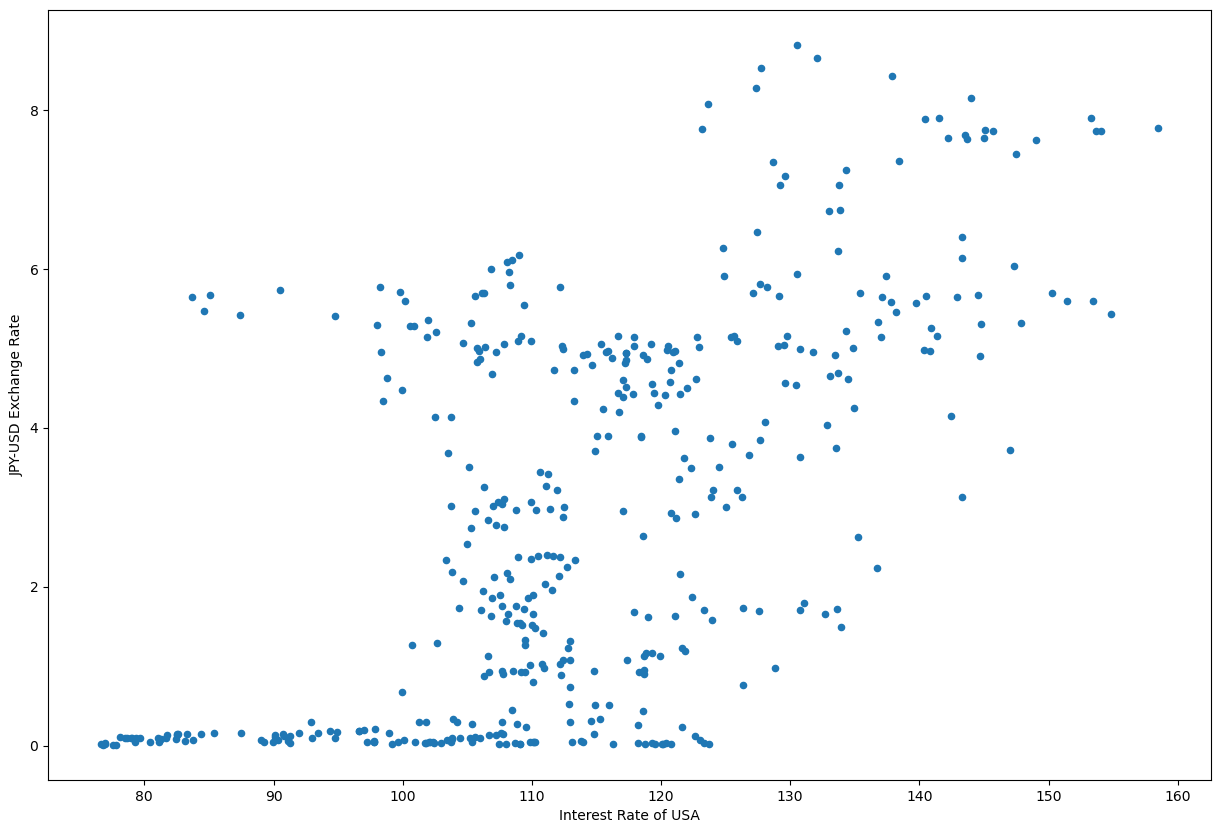

In [37]:
df87.plot.scatter('Ex','R1', figsize = (15,10))
plt.ylabel('JPY-USD Exchange Rate')
plt.xlabel('Interest Rate of USA')
plt.show()

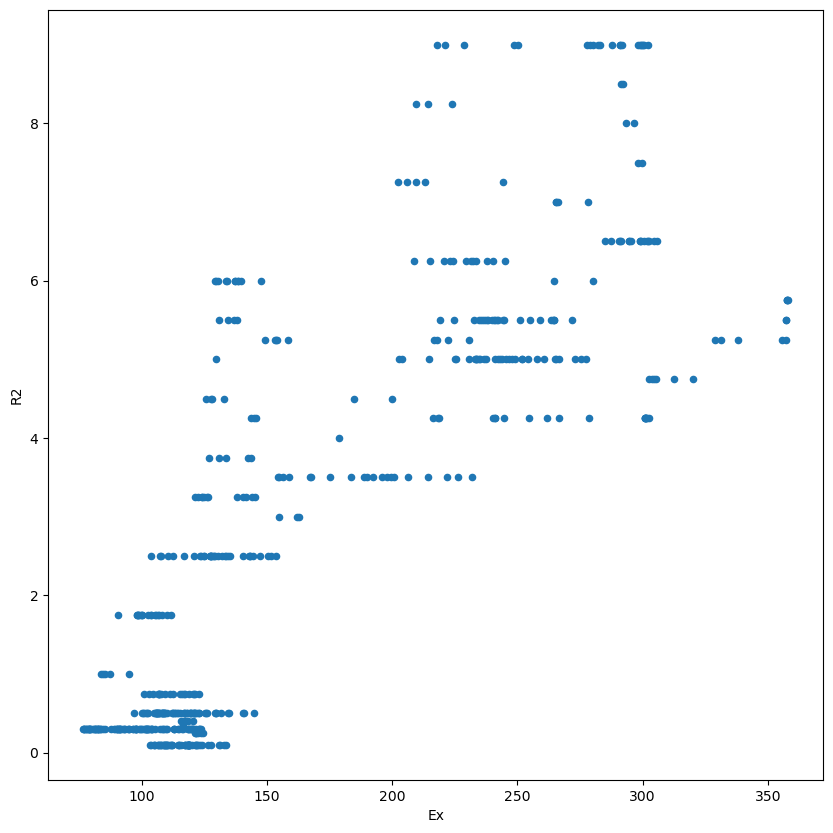

R2
0.30    101
0.50     67
0.10     58
5.00     34
2.50     34
5.50     30
4.25     22
9.00     21
0.75     20
3.50     20
1.75     19
6.50     17
5.25     14
6.00     13
3.25     12
6.25     12
0.40      7
0.25      6
4.50      6
4.75      6
1.00      5
7.25      5
3.75      5
5.75      4
7.00      4
3.00      3
8.25      3
7.50      2
8.00      2
8.50      2
4.00      1
0.35      1
Name: count, dtype: int64


In [38]:
df.plot.scatter('Ex','R2', figsize = (10,10))
plt.show()
print(df['R2'].value_counts())

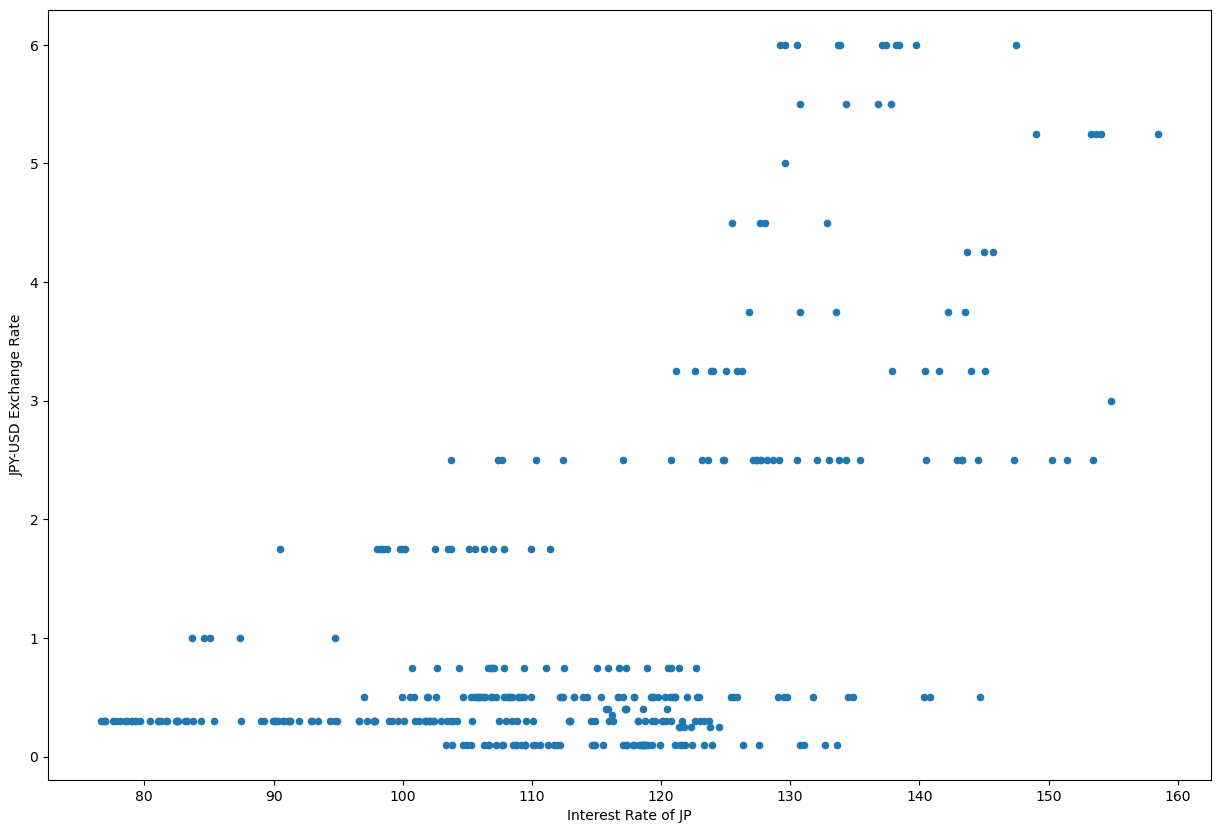

R2
0.30    101
0.50     67
0.10     58
2.50     34
0.75     20
1.75     19
3.25     12
6.00     11
0.40      7
0.25      6
3.75      5
5.25      5
1.00      5
4.50      4
5.50      4
4.25      3
0.35      1
5.00      1
3.00      1
Name: count, dtype: int64


In [39]:
df87.plot.scatter('Ex','R2', figsize = (15,10))
plt.ylabel('JPY-USD Exchange Rate')
plt.xlabel('Interest Rate of JP')
plt.show()

print(df87['R2'].value_counts())

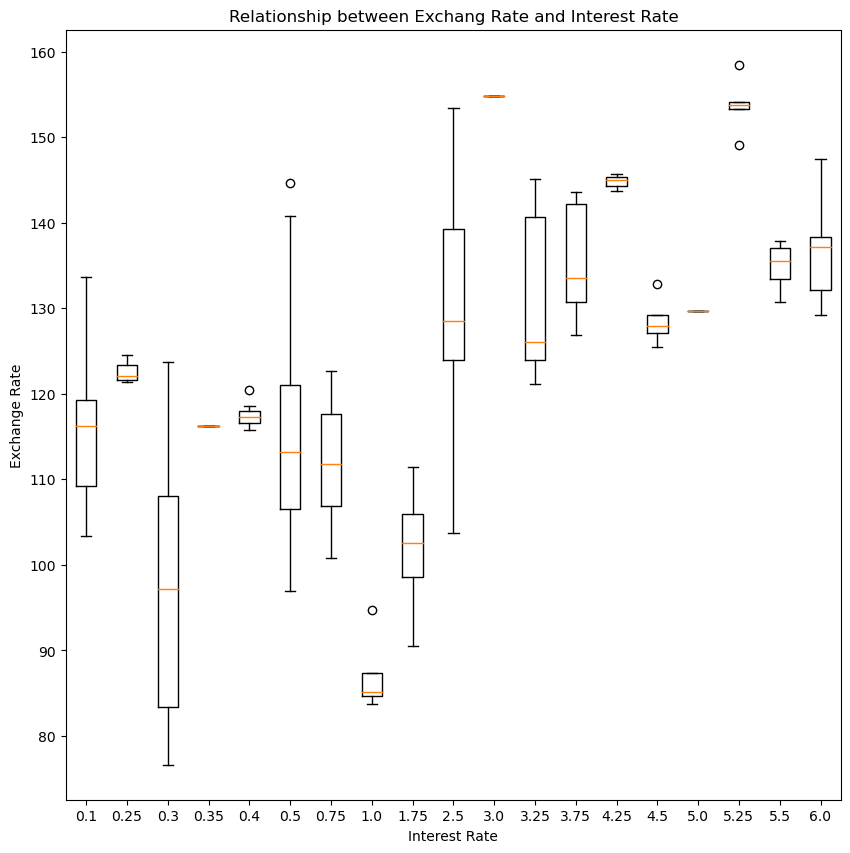

In [40]:
ordinal = [0.1, 0.25, 0.3, 0.35, 0.4, 0.5, 0.75, 1.0, 1.75, 2.5, 3.0, 3.25, 3.75, 4.25, 4.5, 5.0, 5.25, 5.5, 6.0]
dataset = []
for i in ordinal:
    Ex_value = df87[df87['R2'] == i]['Ex'].values
    dataset.append(Ex_value)
    
positions = list(range(1, len(ordinal) + 1))
xticks = ordinal
plt.figure(figsize = (10,10))
plt.boxplot(dataset)
plt.ylabel('Exchange Rate')
plt.xlabel('Interest Rate')
plt.xticks(positions,xticks)
plt.title('Relationship between Exchang Rate and Interest Rate')
# caption = '''houses with the overall condition rating of 5 have the highest median price(outliers excluded), 
#                                   as well as the most outliers'''
# plt.text(0.05, -0.1, caption,transform=plt.gca().transAxes, fontsize=12, color='grey')
plt.show()

Text(0.5, -0.05, 'Relationship between exchange rate and former exchange rate')

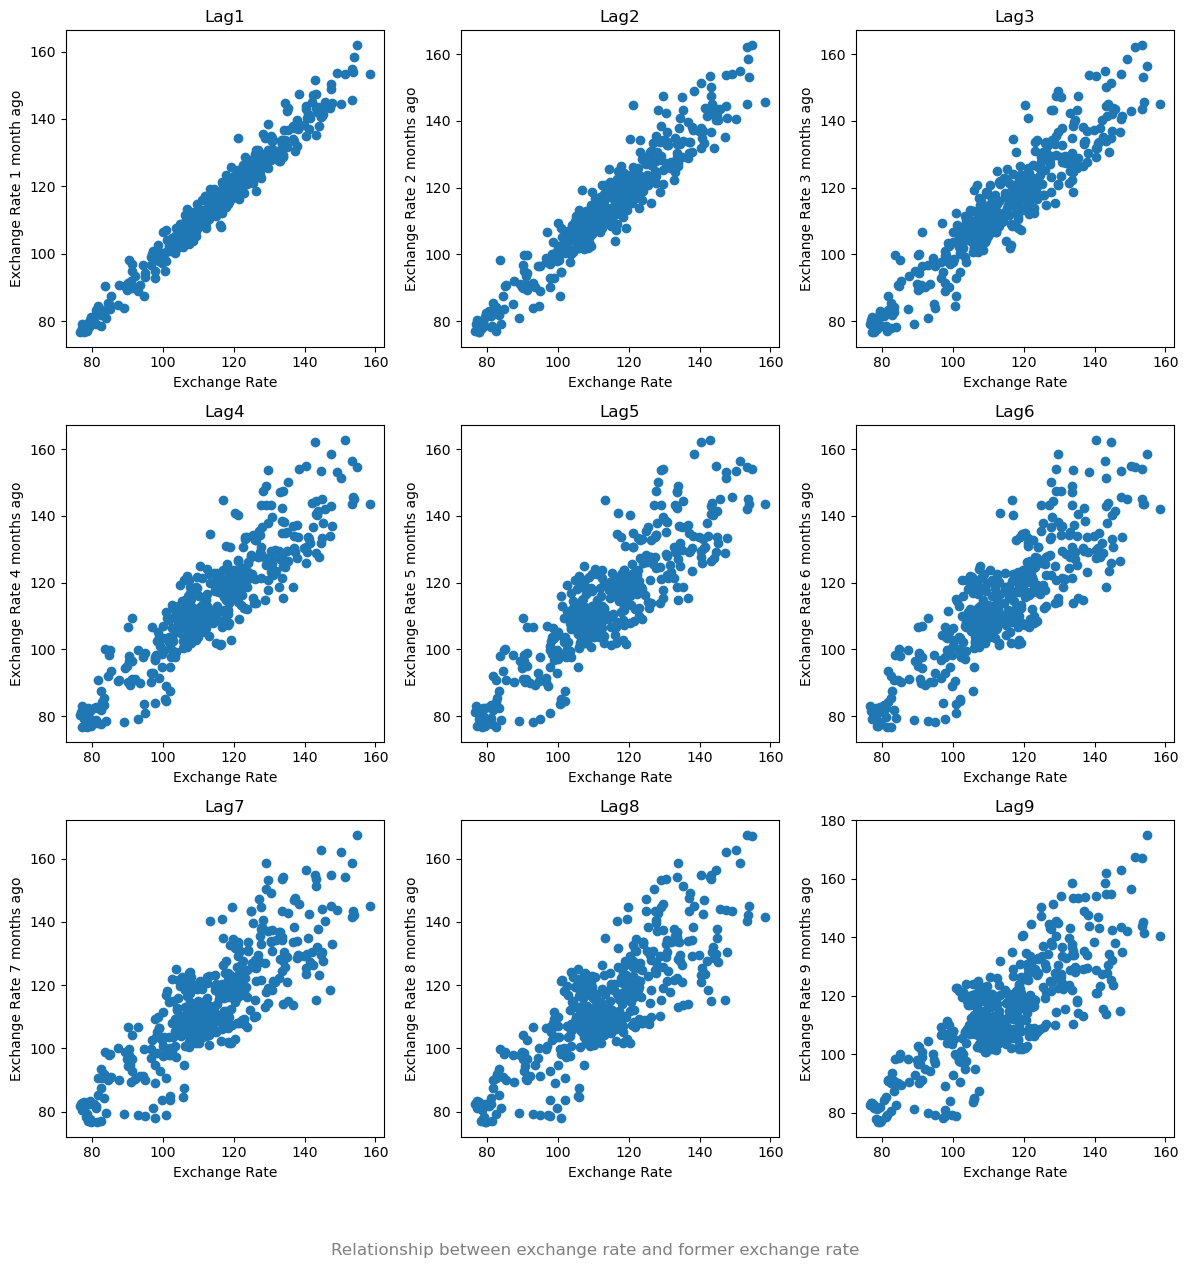

In [41]:
import matplotlib 
from matplotlib import pylab as plt
import numpy as np
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
#plot BMI
axes[0,0].scatter(df87['Ex'],df87['ExLag1'])
axes[0,0].set_xlabel('Exchange Rate')
axes[0,0].set_ylabel('Exchange Rate 1 month ago')
axes[0,0].set_title('Lag1')

#plot BP
axes[0,1].scatter(df87['Ex'],df87['ExLag2'])
axes[0,1].set_xlabel('Exchange Rate')
axes[0,1].set_ylabel('Exchange Rate 2 months ago')
axes[0,1].set_title('Lag2')

#plot S1
axes[0,2].scatter(df87['Ex'],df87['ExLag3'])
axes[0,2].set_xlabel('Exchange Rate')
axes[0,2].set_ylabel('Exchange Rate 3 months ago')
axes[0,2].set_title('Lag3')

#plot S2
axes[1,0].scatter(df87['Ex'],df87['ExLag4'])
axes[1,0].set_xlabel('Exchange Rate')
axes[1,0].set_ylabel('Exchange Rate 4 months ago')
axes[1,0].set_title('Lag4')

#plot S3
axes[1,1].scatter(df87['Ex'],df87['ExLag5'])
axes[1,1].set_xlabel('Exchange Rate')
axes[1,1].set_ylabel('Exchange Rate 5 months ago')
axes[1,1].set_title('Lag5')

#plot s4
axes[1,2].scatter(df87['Ex'],df87['ExLag6'])
axes[1,2].set_xlabel('Exchange Rate')
axes[1,2].set_ylabel('Exchange Rate 6 months ago')
axes[1,2].set_title('Lag6')

#plot s5
axes[2,0].scatter(df87['Ex'],df87['ExLag7'])
axes[2,0].set_xlabel('Exchange Rate')
axes[2,0].set_ylabel('Exchange Rate 7 months ago')
axes[2,0].set_title('Lag7')

#plot s6
axes[2,1].scatter(df87['Ex'],df87['ExLag8'])
axes[2,1].set_xlabel('Exchange Rate')
axes[2,1].set_ylabel('Exchange Rate 8 months ago')
axes[2,1].set_title('Lag8')

#plot s6
axes[2,2].scatter(df87['Ex'],df87['ExLag9'])
axes[2,2].set_xlabel('Exchange Rate')
axes[2,2].set_ylabel('Exchange Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)



Text(0.5, -0.05, 'Relationship between exchange rate and former exchange rate')

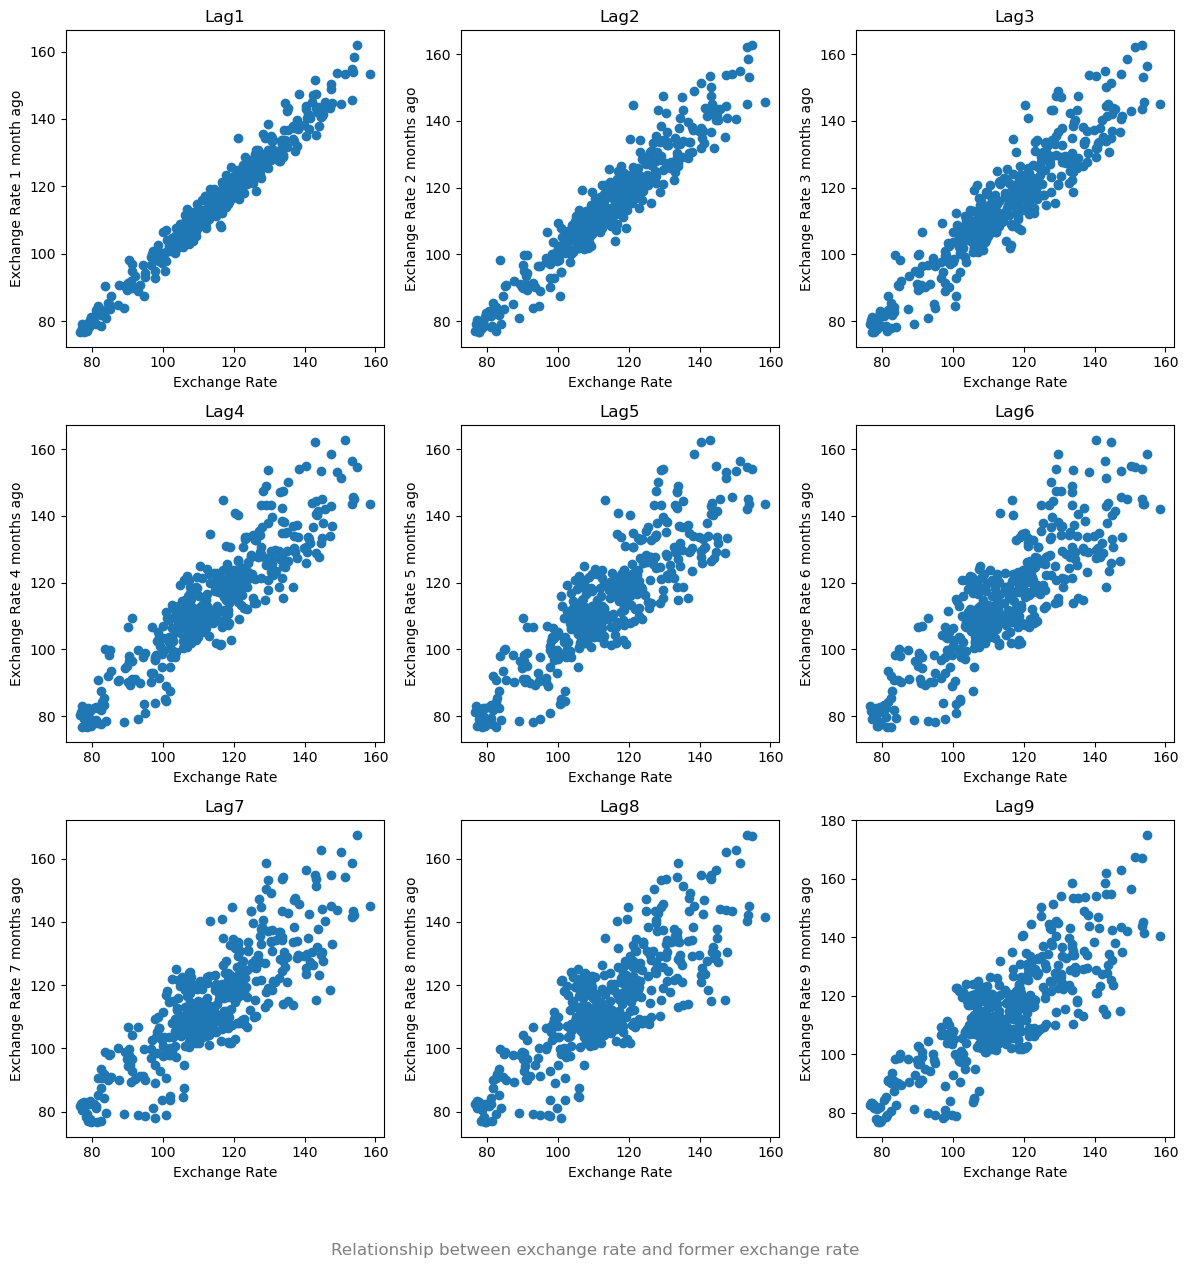

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
#plot BMI
axes[0,0].scatter(df87['Ex'],df87['ExLag1'])
axes[0,0].set_xlabel('Exchange Rate')
axes[0,0].set_ylabel('Exchange Rate 1 month ago')
axes[0,0].set_title('Lag1')

#plot BP
axes[0,1].scatter(df87['Ex'],df87['ExLag2'])
axes[0,1].set_xlabel('Exchange Rate')
axes[0,1].set_ylabel('Exchange Rate 2 months ago')
axes[0,1].set_title('Lag2')

#plot S1
axes[0,2].scatter(df87['Ex'],df87['ExLag3'])
axes[0,2].set_xlabel('Exchange Rate')
axes[0,2].set_ylabel('Exchange Rate 3 months ago')
axes[0,2].set_title('Lag3')

#plot S2
axes[1,0].scatter(df87['Ex'],df87['ExLag4'])
axes[1,0].set_xlabel('Exchange Rate')
axes[1,0].set_ylabel('Exchange Rate 4 months ago')
axes[1,0].set_title('Lag4')

#plot S3
axes[1,1].scatter(df87['Ex'],df87['ExLag5'])
axes[1,1].set_xlabel('Exchange Rate')
axes[1,1].set_ylabel('Exchange Rate 5 months ago')
axes[1,1].set_title('Lag5')

#plot s4
axes[1,2].scatter(df87['Ex'],df87['ExLag6'])
axes[1,2].set_xlabel('Exchange Rate')
axes[1,2].set_ylabel('Exchange Rate 6 months ago')
axes[1,2].set_title('Lag6')

#plot s5
axes[2,0].scatter(df87['Ex'],df87['ExLag7'])
axes[2,0].set_xlabel('Exchange Rate')
axes[2,0].set_ylabel('Exchange Rate 7 months ago')
axes[2,0].set_title('Lag7')

#plot s6
axes[2,1].scatter(df87['Ex'],df87['ExLag8'])
axes[2,1].set_xlabel('Exchange Rate')
axes[2,1].set_ylabel('Exchange Rate 8 months ago')
axes[2,1].set_title('Lag8')

#plot s6
axes[2,2].scatter(df87['Ex'],df87['ExLag9'])
axes[2,2].set_xlabel('Exchange Rate')
axes[2,2].set_ylabel('Exchange Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)


Text(0.5, -0.05, 'Relationship between exchange rate and former exchange rate of USA')

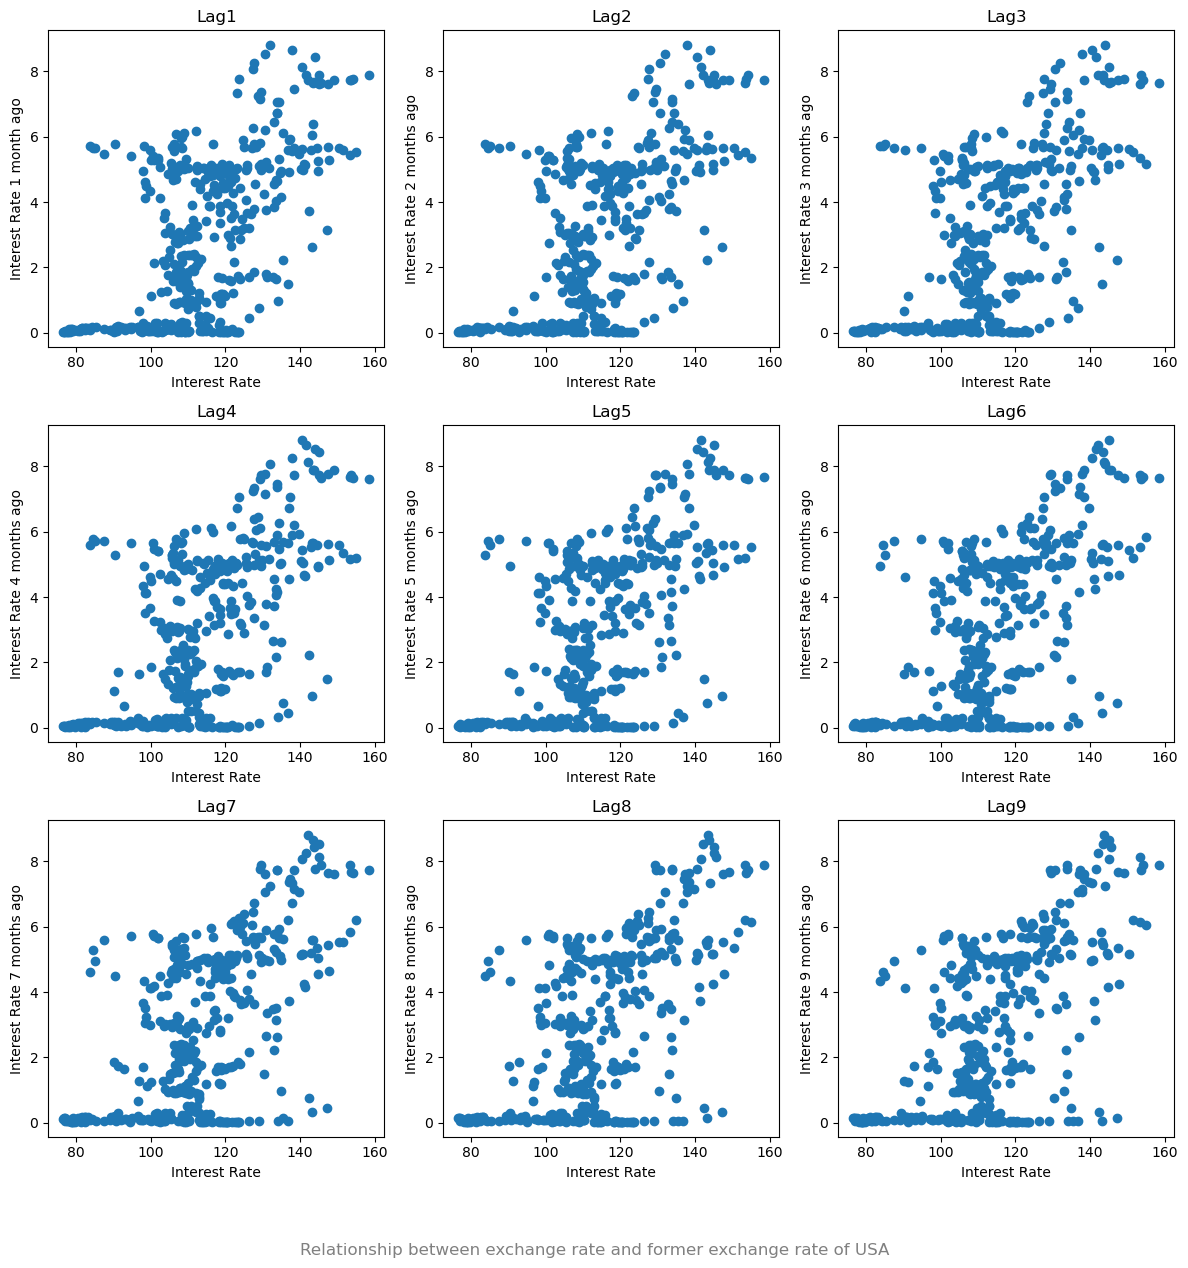

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
#plot BMI
axes[0,0].scatter(df87['Ex'],df87['R1Lag1'])
axes[0,0].set_xlabel('Interest Rate')
axes[0,0].set_ylabel('Interest Rate 1 month ago')
axes[0,0].set_title('Lag1')

#plot BP
axes[0,1].scatter(df87['Ex'],df87['R1Lag2'])
axes[0,1].set_xlabel('Interest Rate')
axes[0,1].set_ylabel('Interest Rate 2 months ago')
axes[0,1].set_title('Lag2')

#plot S1
axes[0,2].scatter(df87['Ex'],df87['R1Lag3'])
axes[0,2].set_xlabel('Interest Rate')
axes[0,2].set_ylabel('Interest Rate 3 months ago')
axes[0,2].set_title('Lag3')

#plot S2
axes[1,0].scatter(df87['Ex'],df87['R1Lag4'])
axes[1,0].set_xlabel('Interest Rate')
axes[1,0].set_ylabel('Interest Rate 4 months ago')
axes[1,0].set_title('Lag4')

#plot S3
axes[1,1].scatter(df87['Ex'],df87['R1Lag5'])
axes[1,1].set_xlabel('Interest Rate')
axes[1,1].set_ylabel('Interest Rate 5 months ago')
axes[1,1].set_title('Lag5')

#plot s4
axes[1,2].scatter(df87['Ex'],df87['R1Lag6'])
axes[1,2].set_xlabel('Interest Rate')
axes[1,2].set_ylabel('Interest Rate 6 months ago')
axes[1,2].set_title('Lag6')

#plot s5
axes[2,0].scatter(df87['Ex'],df87['R1Lag7'])
axes[2,0].set_xlabel('Interest Rate')
axes[2,0].set_ylabel('Interest Rate 7 months ago')
axes[2,0].set_title('Lag7')

#plot s6
axes[2,1].scatter(df87['Ex'],df87['R1Lag8'])
axes[2,1].set_xlabel('Interest Rate')
axes[2,1].set_ylabel('Interest Rate 8 months ago')
axes[2,1].set_title('Lag8')

#plot s6
axes[2,2].scatter(df87['Ex'],df87['R1Lag9'])
axes[2,2].set_xlabel('Interest Rate')
axes[2,2].set_ylabel('Interest Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate of USA"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)


Text(0.5, -0.05, 'Relationship between exchange rate and former exchange rate of USA')

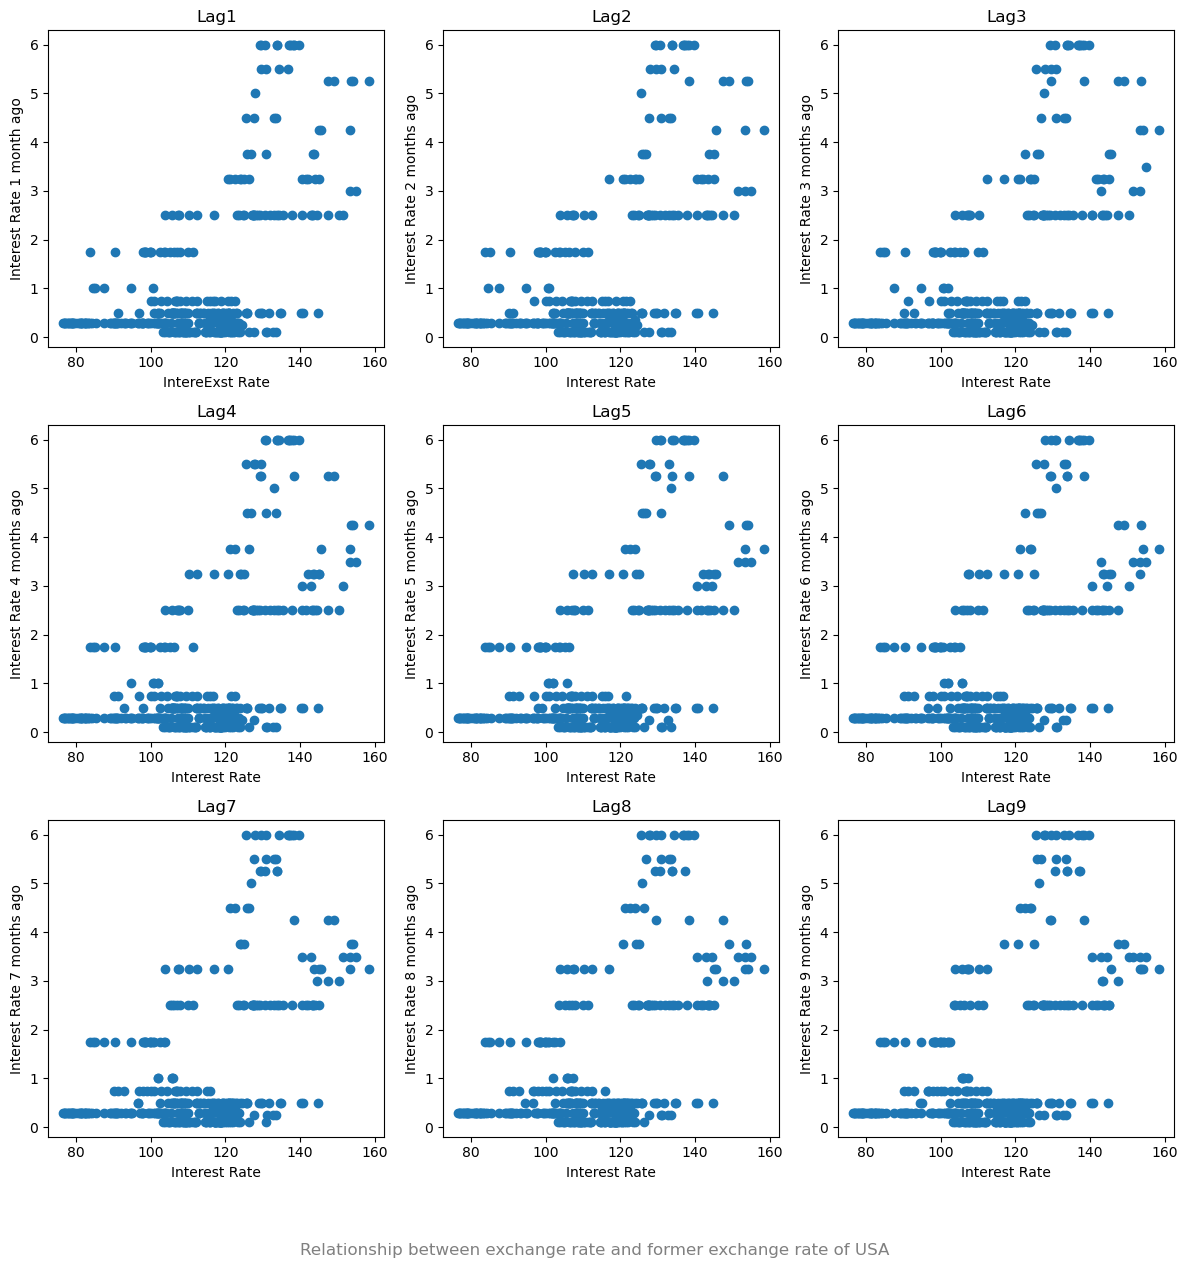

In [44]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
#plot BMI
axes[0,0].scatter(df87['Ex'],df87['R2Lag1'])
axes[0,0].set_xlabel('IntereExst Rate')
axes[0,0].set_ylabel('Interest Rate 1 month ago')
axes[0,0].set_title('Lag1')

#plot BP
axes[0,1].scatter(df87['Ex'],df87['R2Lag2'])
axes[0,1].set_xlabel('Interest Rate')
axes[0,1].set_ylabel('Interest Rate 2 months ago')
axes[0,1].set_title('Lag2')

#plot S1
axes[0,2].scatter(df87['Ex'],df87['R2Lag3'])
axes[0,2].set_xlabel('Interest Rate')
axes[0,2].set_ylabel('Interest Rate 3 months ago')
axes[0,2].set_title('Lag3')

#plot S2
axes[1,0].scatter(df87['Ex'],df87['R2Lag4'])
axes[1,0].set_xlabel('Interest Rate')
axes[1,0].set_ylabel('Interest Rate 4 months ago')
axes[1,0].set_title('Lag4')

#plot S3
axes[1,1].scatter(df87['Ex'],df87['R2Lag5'])
axes[1,1].set_xlabel('Interest Rate')
axes[1,1].set_ylabel('Interest Rate 5 months ago')
axes[1,1].set_title('Lag5')

#plot s4
axes[1,2].scatter(df87['Ex'],df87['R2Lag6'])
axes[1,2].set_xlabel('Interest Rate')
axes[1,2].set_ylabel('Interest Rate 6 months ago')
axes[1,2].set_title('Lag6')

#plot s5
axes[2,0].scatter(df87['Ex'],df87['R2Lag7'])
axes[2,0].set_xlabel('Interest Rate')
axes[2,0].set_ylabel('Interest Rate 7 months ago')
axes[2,0].set_title('Lag7')

#plot s6
axes[2,1].scatter(df87['Ex'],df87['R2Lag8'])
axes[2,1].set_xlabel('Interest Rate')
axes[2,1].set_ylabel('Interest Rate 8 months ago')
axes[2,1].set_title('Lag8')

#plot s6
axes[2,2].scatter(df87['Ex'],df87['R2Lag9'])
axes[2,2].set_xlabel('Interest Rate')
axes[2,2].set_ylabel('Interest Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate of USA"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)


In [63]:
#split data
df87 = df[192:]
df87['year'] = pd.to_datetime(df87.date).dt.year #create a time index 'year'
#df87.set_index('year', inplace=True)

print(df87.head())

           date        Ex  ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  \
192  1987-01-01  154.8295  162.05  162.85  156.47  154.73  154.18  158.61   
193  1987-02-01  153.4068  154.83  162.05  162.85  156.47  154.73  154.18   
194  1987-03-01  151.4332  153.41  154.83  162.05  162.85  156.47  154.73   
195  1987-04-01  142.8986  151.43  153.41  154.83  162.05  162.85  156.47   
196  1987-05-01  140.4790  142.90  151.43  153.41  154.83  162.05  162.85   

     ExLag7  ExLag8  ...  R2Lag2  R2Lag3  R2Lag4  R2Lag5  R2Lag6  R2Lag7  \
192  167.54  167.03  ...     3.0     3.5     3.5     3.5     3.5     3.5   
193  158.61  167.54  ...     3.0     3.0     3.5     3.5     3.5     3.5   
194  154.18  158.61  ...     3.0     3.0     3.0     3.5     3.5     3.5   
195  154.73  154.18  ...     2.5     3.0     3.0     3.0     3.5     3.5   
196  156.47  154.73  ...     2.5     2.5     3.0     3.0     3.0     3.5   

     R2Lag8  R2Lag9  R2Lag10  year  
192     3.5     3.5      4.0  1987  
193   

C:\Users\guyu8\AppData\Local\Temp\ipykernel_53244\3392223463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df87['year'] = pd.to_datetime(df87.date).dt.year #create a time index 'year'


In [64]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 4)

df87.set_index('year', inplace=True)
df87.sort_index(inplace=True)
X = df87.drop(labels=['Ex'], axis=1)
y = df87['Ex']

for train_index, test_index in tss.split(X):
    X_other, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_other, y_test = y.iloc[train_index], y.iloc[test_index]

print(X_other.index)
print("X_test:", X_test.index)
print(len(X_test))

Index([1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
       ...
       2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016],
      dtype='int32', name='year', length=353)
X_test: Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023],
      dtype='int32', name='year')
88


In [65]:
for train_index, test_index in tss.split(X_other):
    X_train, X_val = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

print("X_train:",X_train.index)
print("X_val:", X_val.index)
print(len(X_val))
print(X_train.head())

X_train: Index([1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
       ...
       2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='year', length=283)
X_val: Index([2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016],
      dtype='int32', name='year')
70
            date  ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  ExLag7  \
year                                                                       
1987  1987-01-01  162.05  162.85  156.47  154.73  154.18  158.61  167.54   
1987  1987-02-01  154.83  162.05  162.85  156.47  154.73  154.18

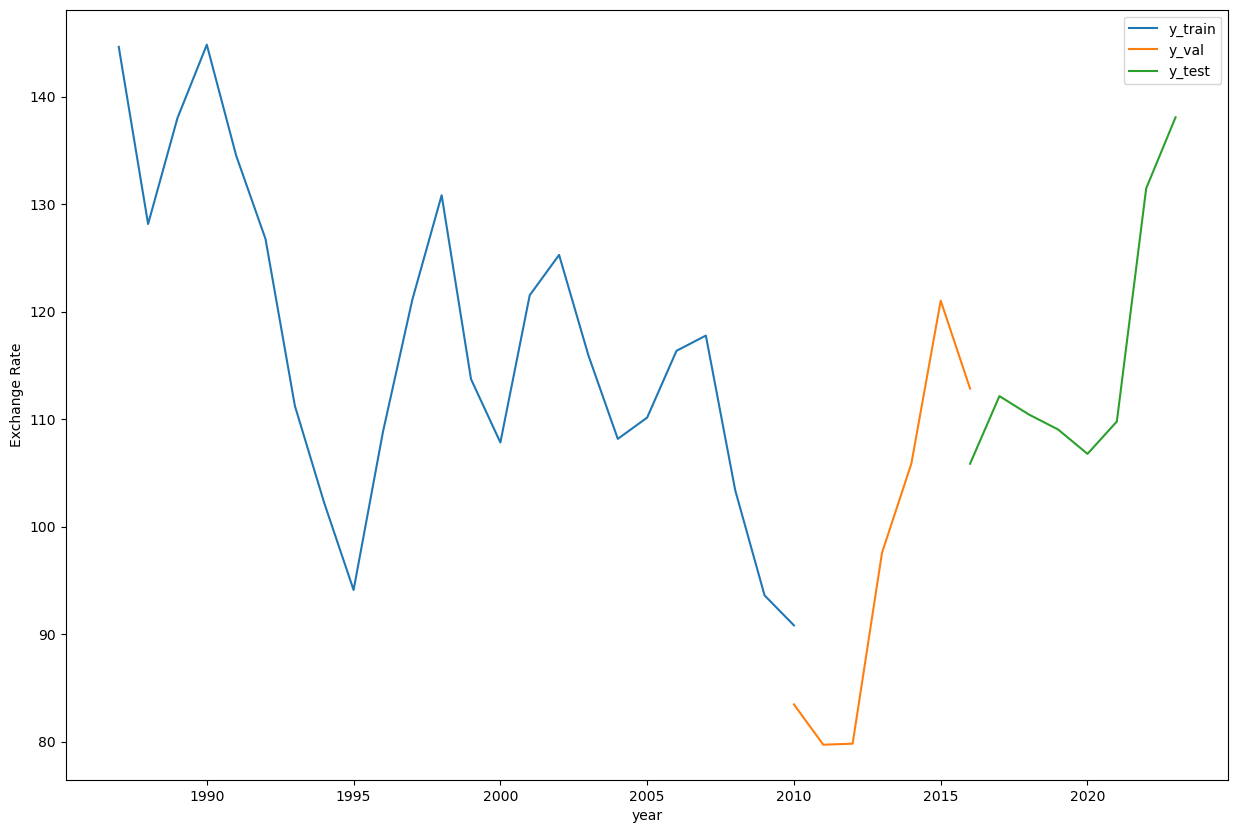

In [69]:

print()
plt.figure(figsize = (15,10))
y_train.groupby('year').mean().plot(label='y_train')
y_val.groupby('year').mean().plot(label='y_val')
y_test.groupby('year').mean().plot(label='y_test')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

std_ftrs = ['ExLag1','ExLag2','ExLag3','ExLag4','ExLag5','ExLag6','ExLag7','ExLag8','ExLag9','ExLag10','R1','R1Lag1','R1Lag2','R1Lag3','R1Lag4','R1Lag5','R1Lag6','R1Lag7','R1Lag8','R1Lag9','R1Lag10','R2','R2Lag1','R2Lag2','R2Lag3','R2Lag4','R2Lag5','R2Lag6','R2Lag7','R2Lag8','R2Lag9','R2Lag10']

#collect all the encoders
preprocessor = ColumnTransformer(
    transformers = [('std', StandardScaler(), std_ftrs)])


clf = Pipeline(steps = [('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

#print(X_train.shape)
#print(X_train_prep.shape)
print(X_train_prep)

[[ 2.84848429  2.85686835  2.42196456 ...  1.20238648  1.19366784
   1.48102967]
 [ 2.38381001  2.80585799  2.82650661 ...  1.20238648  1.19366784
   1.18231155]
 [ 2.29241978  2.34548953  2.77578034 ...  1.20238648  1.19366784
   1.18231155]
 ...
 [-1.56656493 -1.7423529  -1.78387776 ... -0.71820828 -0.72382324
  -0.72948443]
 [-1.66181672 -1.56828006 -1.74710121 ... -0.71820828 -0.72382324
  -0.72948443]
 [-1.73647353 -1.66264922 -1.57399779 ... -0.71820828 -0.72382324
  -0.72948443]]
